<h1>DATA 620 - Week 6 - DAVIS SOUTHERN CLUB WOMEN</h1>

<i><h3>Mohamed Thasleem, Kalikul Zaman<br>
Jeyaraman, Ramalingam</h3></i>

<h3>Introduction - Davis Southern Club Women</h3>

These data were collected by Davis et al. in the 1930s. They represent observed attendance at 14 social events by 18 Southern women, this assignment aim to answer the relationships between (1) the women, and (2) the social events?  

----------Information About Graph----------------
Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


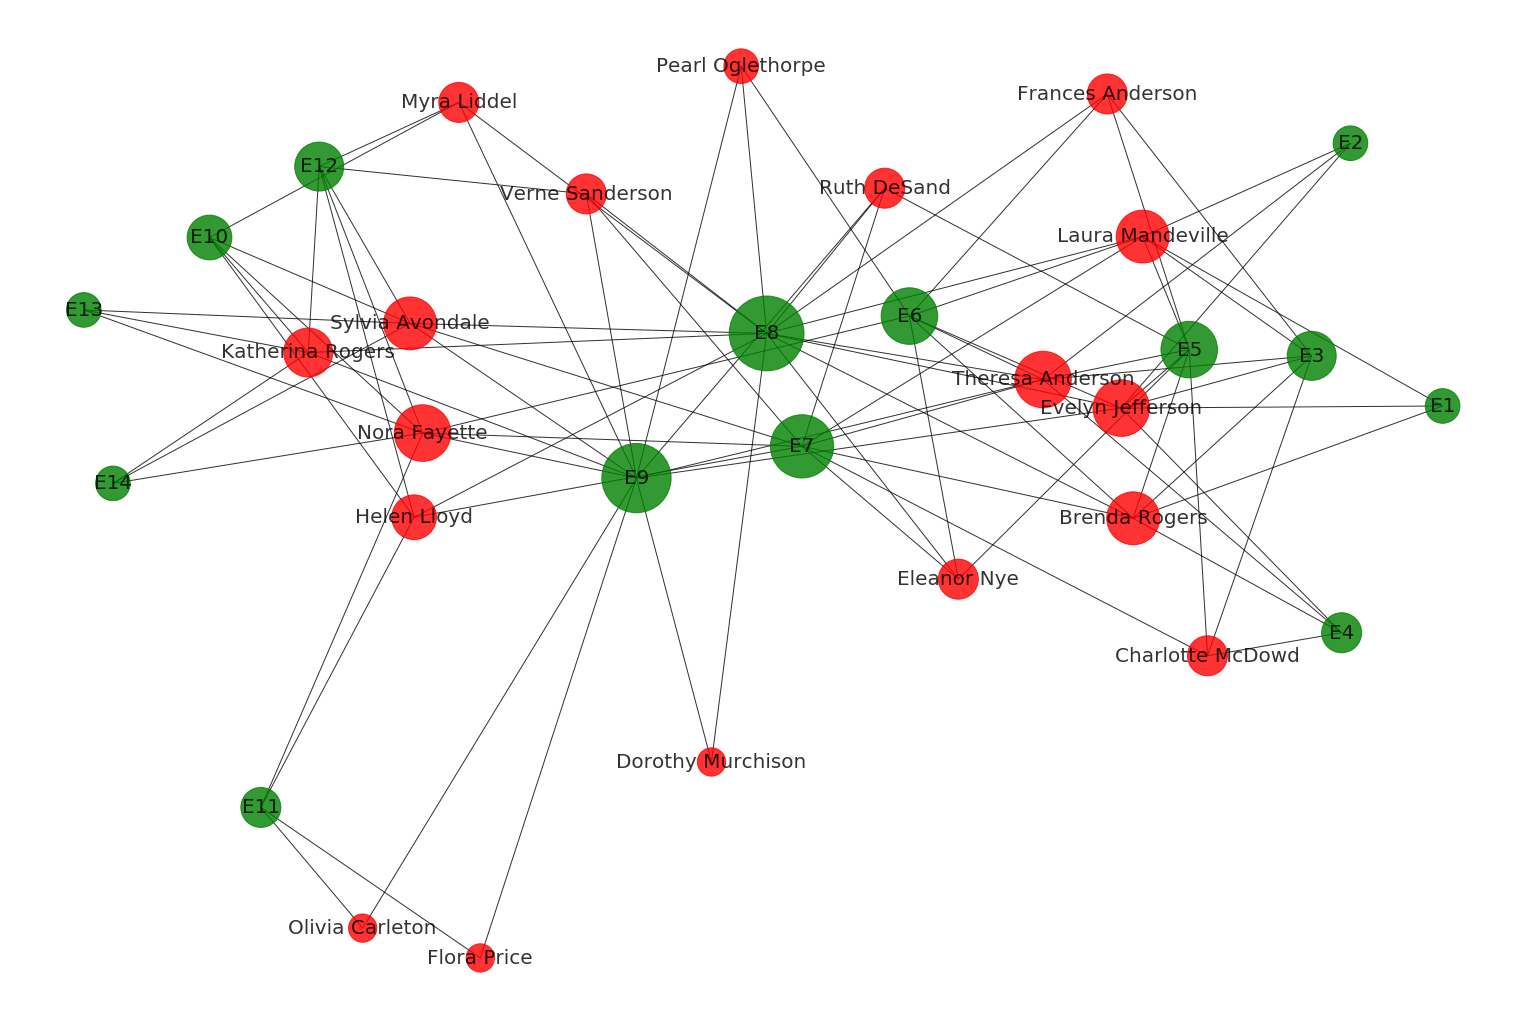

In [13]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import matplotlib.pyplot as plot
import matplotlib.colors as colors
import pandas as pd

plot.rcParams['figure.figsize'] = (21, 14)

G = nx.davis_southern_women_graph()

women = G.graph['top']
events = G.graph['bottom']
nodes = G.number_of_nodes()
edges = G.number_of_edges()
top_nodes, bottom_nodes = nx.bipartite.sets(G)

g_degrees1 = nx.degree(G)
g_degrees = sorted(zip(dict(g_degrees1).values(), dict(g_degrees1).keys()), reverse=True)
colors=[]
all_degrees1 = dict(g_degrees1).keys()
women_degrees1 = G.degree(top_nodes)
women_degrees = dict(women_degrees1).keys()


print("----------Information About Graph----------------")
for n in all_degrees1:
    if n in women_degrees:
        colors.append('r')
    else:
        colors.append('g')
print(nx.info(G))
nx.draw(G, node_size=[v*400 for v in dict(g_degrees1).values()],node_color=colors,with_labels=True, alpha=.80, font_size=20)

<h3>Pair who attends events together</h3>

Finding which pair attends the events together based on the weightage calculated

In [14]:
print("----------Pair who attends events together----------------")
# Project Graph on Women and Find which pair attends the events together

l=bipartite.weighted_projected_graph(G,women)
df = nx.to_pandas_edgelist(l)
print(df.sort_values(by='weight',ascending=False))

----------Pair who attends events together----------------
               source             target  weight
13   Evelyn Jefferson   Theresa Anderson       7
16   Evelyn Jefferson      Brenda Rogers       6
11   Evelyn Jefferson   Laura Mandeville       6
120  Katherina Rogers    Sylvia Avondale       6
30   Laura Mandeville      Brenda Rogers       6
..                ...                ...     ...
103   Verne Sanderson        Flora Price       1
73   Frances Anderson  Dorothy Murchison       1
41   Theresa Anderson    Olivia Carleton       1
107   Verne Sanderson    Olivia Carleton       1
0    Evelyn Jefferson        Flora Price       1

[139 rows x 3 columns]


<h3>Closeness Measure - Which women can pass information faster to others</h3>

The below are the list of women who can pass information faster to others ordered by weightage

In [15]:
print("----------Closeness Measure - Which women can pass information faster to others----------------")
# Closeness Measure - Which women can pass information faster to others

clos_cen = nx.closeness_centrality(l)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
print(df_close.sort_values(by='weight',ascending=False))

----------Closeness Measure - Which women can pass information faster to others----------------
                     weight
Evelyn Jefferson   1.000000
Ruth DeSand        1.000000
Helen Lloyd        1.000000
Nora Fayette       1.000000
Sylvia Avondale    1.000000
Verne Sanderson    1.000000
Theresa Anderson   1.000000
Pearl Oglethorpe   0.944444
Myra Liddel        0.944444
Katherina Rogers   0.944444
Dorothy Murchison  0.944444
Eleanor Nye        0.894737
Frances Anderson   0.894737
Laura Mandeville   0.894737
Brenda Rogers      0.894737
Olivia Carleton    0.772727
Flora Price        0.772727
Charlotte McDowd   0.739130


<h3>Eigen Measure - Influential Women</h3>

In [16]:
print("----------Eigen Measure - Influential Women----------------")
# Eigen Measure - Influential Women

eig_cen = nx.eigenvector_centrality(l)
df_eig = pd.DataFrame.from_dict(eig_cen,orient='index',columns=['weight'])
print(df_eig.sort_values(by='weight',ascending=False))

----------Eigen Measure - Influential Women----------------
                     weight
Evelyn Jefferson   0.253524
Theresa Anderson   0.253524
Ruth DeSand        0.253524
Helen Lloyd        0.253524
Nora Fayette       0.253524
Sylvia Avondale    0.253524
Verne Sanderson    0.253524
Pearl Oglethorpe   0.243157
Myra Liddel        0.243157
Katherina Rogers   0.243157
Dorothy Murchison  0.243157
Eleanor Nye        0.230973
Laura Mandeville   0.230973
Frances Anderson   0.230973
Brenda Rogers      0.230973
Olivia Carleton    0.187639
Flora Price        0.187639
Charlotte McDowd   0.172527


<h3>Events which are related to each other</h3>

Events and Findings which events are related, if women visits Event A they tend to visit Event B,C,D

In [17]:
print("----------Events which are related to each other----------------")

# Project Graph on Events and Find which events are related, if women visits Event A they tend to visit Event B,C,D

c=bipartite.weighted_projected_graph(G,events)
df = nx.to_pandas_edgelist(c)
print(df.sort_values(by='weight',ascending=False))

----------Events which are related to each other----------------
   source target  weight
47     E8     E9       9
44     E7     E8       8
29     E5     E8       7
37     E6     E8       7
28     E5     E7       6
..    ...    ...     ...
46     E8    E11       1
35     E6    E14       1
34     E6    E13       1
1      E1     E9       1
33     E6    E10       1

[66 rows x 3 columns]


<h3>Closeness Measure - Which event can pass information faster to others</h3>

The below are the list of events who can pass information faster to others ordered by weightage

In [18]:
# Closeness Measure - Which event can pass information faster to others
print("----------Closeness Measure - Which event can pass information faster to others----------------")
clos_cen = nx.closeness_centrality(c)
df_close = pd.DataFrame.from_dict(clos_cen,orient='index',columns=['weight'])
print(df_close.sort_values(by='weight',ascending=False))

----------Closeness Measure - Which event can pass information faster to others----------------
       weight
E6   1.000000
E7   1.000000
E8   1.000000
E9   1.000000
E1   0.722222
E2   0.722222
E3   0.722222
E4   0.722222
E5   0.722222
E10  0.722222
E11  0.722222
E12  0.722222
E13  0.722222
E14  0.722222


<h3>Closeness Measure - Influential Event</h3>

Most Influential Event listed

In [19]:
print("----------Closeness Measure - Influential Event----------------")
# Closeness Measure - Influential Event

eig_cen = nx.eigenvector_centrality(c)
df_eig = pd.DataFrame.from_dict(eig_cen,orient='index',columns=['weight'])
print(df_eig.sort_values(by='weight',ascending=False))


----------Closeness Measure - Influential Event----------------
       weight
E6   0.339336
E7   0.339336
E8   0.339336
E9   0.339336
E10  0.232251
E11  0.232251
E12  0.232251
E13  0.232251
E14  0.232251
E1   0.232251
E2   0.232251
E3   0.232251
E4   0.232251
E5   0.232251


<h3>Findings using Betweenness Centrality</h3>

Verify the above findings using Betweenness Centrality, the top values for women & events prove above findings

In [20]:
print("----------Verify Findings using Betweenness Centrality, the top values can be verified----------------")

# Verify the above findings using Betweenness Centrality, the top values for women & events prove above findings

between_cen = nx.betweenness_centrality(G)
df_between = pd.DataFrame.from_dict(between_cen,orient='index',columns=['weight'])
print(df_between.sort_values(by='weight',ascending=False))


----------Verify Findings using Betweenness Centrality, the top values can be verified----------------
                     weight
E8                 0.237003
E9                 0.219209
E7                 0.125881
Nora Fayette       0.108581
Evelyn Jefferson   0.092431
Theresa Anderson   0.083827
Sylvia Avondale    0.068625
E6                 0.063199
Laura Mandeville   0.049149
Brenda Rogers      0.047358
Katherina Rogers   0.045326
Helen Lloyd        0.040564
E5                 0.036641
E11                0.019116
E3                 0.017715
E12                0.017588
Ruth DeSand        0.016061
Myra Liddel        0.015641
Verne Sanderson    0.015061
E10                0.011122
Frances Anderson   0.010254
Charlotte McDowd   0.010140
Eleanor Nye        0.009038
E4                 0.007487
Pearl Oglethorpe   0.006508
Olivia Carleton    0.004837
Flora Price        0.004837
E13                0.002178
E14                0.002178
E1                 0.002094
E2                 0.002030
D

<h3>Other Measures</h3>

The below mearsure also calculated and ordered from top to bottom
<li>Women who attend most events</li>
<li>Events for Which Most Women Attend</li>

In [21]:
# Other Measures

print("----------Women who attend most events----------------")
# Women who attend most events

women_degrees1 = G.degree(top_nodes)
women_degrees = sorted(zip(dict(women_degrees1).values(), dict(women_degrees1).keys()), reverse=True)
for i in range(len(women_degrees1)):
    print('%2d          %s' % (women_degrees[i][0], women_degrees[i][1]))

print("----------Events for Which Most Women Attend----------------")
# Events for Which Most Women Attend

event_degrees1 = G.degree(bottom_nodes)
event_degrees = sorted(zip(dict(event_degrees1).values(), dict(event_degrees1).keys()), reverse=True)
for i in range(len(event_degrees1)):
    print('%2d          %s' % (event_degrees[i][0], event_degrees[i][1]))


----------Women who attend most events----------------
 8          Theresa Anderson
 8          Nora Fayette
 8          Evelyn Jefferson
 7          Sylvia Avondale
 7          Laura Mandeville
 7          Brenda Rogers
 6          Katherina Rogers
 5          Helen Lloyd
 4          Verne Sanderson
 4          Ruth DeSand
 4          Myra Liddel
 4          Frances Anderson
 4          Eleanor Nye
 4          Charlotte McDowd
 3          Pearl Oglethorpe
 2          Olivia Carleton
 2          Flora Price
 2          Dorothy Murchison
----------Events for Which Most Women Attend----------------
14          E8
12          E9
10          E7
 8          E6
 8          E5
 6          E3
 6          E12
 5          E10
 4          E4
 4          E11
 3          E2
 3          E14
 3          E13
 3          E1


<h3>Conclusion</h3>

<h4>Inferences from the analysis</h4>
<ul>                                                     
    <li>Evelyn and Theresa attends most events together</li>
    <li>Events 6,7,8,9 are the Most popular events and attended by most women</li>
    <li>Evelyn, Theresa and Nora are the most social and Influential people</li>
</ul>